<a href="https://colab.research.google.com/github/Thipwadee/data-mining/blob/main/Quiz_2_633020982_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
covid = pd.read_csv('/content/covid_19_clean_complete.csv')
covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


ข้อมูลมีขนาดเท่าไหร่ มีกี่ตัวแปร อะไรบ้าง?

In [5]:
covid.shape

(49068, 10)

In [6]:
covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

 ข้อมูลมีการเก็บสถิติการติดโควิดเมื่อใด? (วันเริ่มต้น - วันสุดท้าย)


In [7]:
list(set(covid['Date']))

['2020-02-13',
 '2020-07-26',
 '2020-02-22',
 '2020-04-26',
 '2020-02-09',
 '2020-07-23',
 '2020-06-30',
 '2020-02-29',
 '2020-02-17',
 '2020-05-19',
 '2020-03-07',
 '2020-06-12',
 '2020-07-16',
 '2020-04-22',
 '2020-07-25',
 '2020-03-23',
 '2020-06-08',
 '2020-03-21',
 '2020-06-25',
 '2020-06-01',
 '2020-06-17',
 '2020-01-28',
 '2020-04-14',
 '2020-04-05',
 '2020-04-23',
 '2020-06-03',
 '2020-05-18',
 '2020-04-16',
 '2020-04-27',
 '2020-03-19',
 '2020-05-23',
 '2020-05-05',
 '2020-07-15',
 '2020-02-03',
 '2020-06-13',
 '2020-02-06',
 '2020-07-06',
 '2020-02-14',
 '2020-04-04',
 '2020-02-11',
 '2020-06-14',
 '2020-05-07',
 '2020-02-26',
 '2020-01-31',
 '2020-03-14',
 '2020-05-31',
 '2020-05-03',
 '2020-06-02',
 '2020-02-04',
 '2020-06-24',
 '2020-04-28',
 '2020-04-24',
 '2020-02-10',
 '2020-03-15',
 '2020-02-28',
 '2020-06-15',
 '2020-05-06',
 '2020-03-31',
 '2020-03-20',
 '2020-05-21',
 '2020-04-12',
 '2020-03-13',
 '2020-04-17',
 '2020-05-24',
 '2020-06-16',
 '2020-06-26',
 '2020-07-

สำรวจค่าว่างในข้อมูล ตัวแปรไหนมีค่าสูญหายบ้าง จำนวนเท่าไหร่

In [8]:
covid.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


ทวีปไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [10]:
covid.groupby(['WHO Region'])[['Confirmed']].sum().sort_values(by=['Confirmed'], ascending =False)

,Confirmed
WHO Region,
Americas,402261194
Europe,248879793
Eastern Mediterranean,74082892
South-East Asia,55118365
Western Pacific,26374411
Africa,21791827


ทวีปไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [11]:
covid.groupby(['WHO Region'])[['Recovered']].sum().sort_values(by=['Recovered'], ascending =False)

,Recovered
WHO Region,
Americas,157069444
Europe,123202075
Eastern Mediterranean,48050703
South-East Asia,30030327
Western Pacific,18861950
Africa,11193730


In [12]:
covid.groupby(['WHO Region'])[['Deaths']].sum().sort_values(by=['Deaths'], ascending =False)

,Deaths
WHO Region,
Americas,19359292
Europe,19271040
Eastern Mediterranean,1924029
South-East Asia,1458134
Western Pacific,932430
Africa,439978


- สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

<Axes: xlabel='WHO Region'>

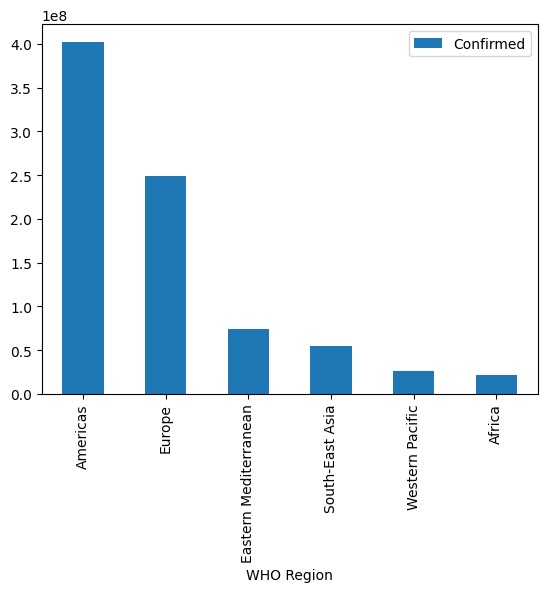

In [13]:
covid.groupby(['WHO Region'])[['Confirmed']].sum().sort_values(by=['Confirmed'], ascending =False).plot.bar()

<Axes: xlabel='WHO Region'>

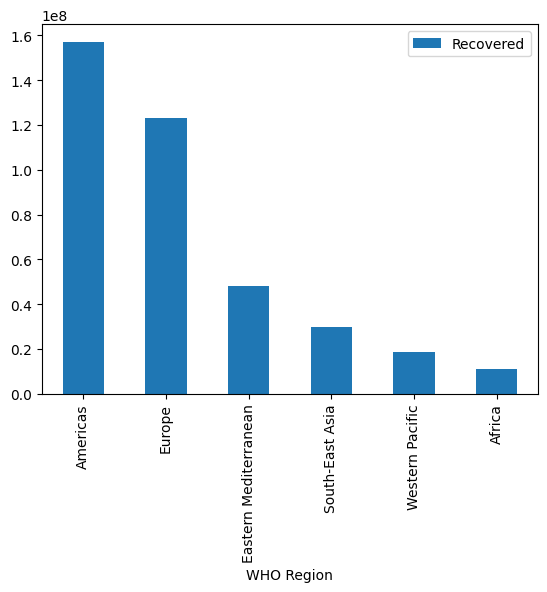

In [14]:
covid.groupby(['WHO Region'])[['Recovered']].sum().sort_values(by=['Recovered'], ascending =False).plot.bar()

<Axes: xlabel='WHO Region'>

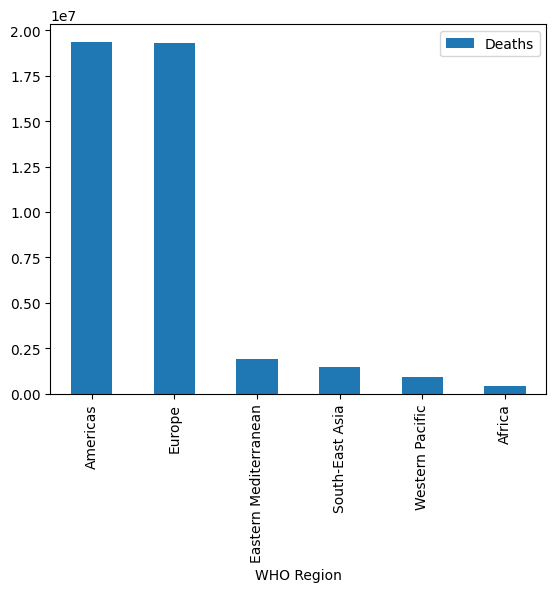

In [15]:
covid.groupby(['WHO Region'])[['Deaths']].sum().sort_values(by=['Deaths'], ascending =False).plot.bar()

ประเทศไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [50]:
Country_Confirmed = covid.groupby(['Country/Region'])[['Confirmed']].sum().sort_values(by=['Confirmed'], ascending =False)
Country_Confirmed

,Confirmed
Country/Region,
US,224345948
Brazil,89524967
Russia,45408411
India,40883464
Spain,27404045
...,...
Saint Kitts and Nevis,1772
Greenland,1507
Holy See,1356


ประเทศไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด


In [52]:
Country_Recovered = covid.groupby(['Country/Region'])[['Recovered']].sum().sort_values(by=['Recovered'], ascending =False)
Country_Recovered

,Recovered
Country/Region,
US,56353416
Brazil,54492873
Russia,25120448
India,23783720
Germany,17107839
...,...
Timor-Leste,0
Mozambique,0
Syria,0


ประเทศไหนมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [45]:
Country_Deaths = covid.groupby(['Country/Region'])[['Deaths']].sum().sort_values(by=['Deaths'], ascending =False)
Country_Deaths

,Deaths
Country/Region,
US,11011411
United Kingdom,3997775
Brazil,3938034
Italy,3707717
France,3048524
...,...
Bhutan,0
Mongolia,0
Timor-Leste,0


สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

<Axes: ylabel='Confirmed'>

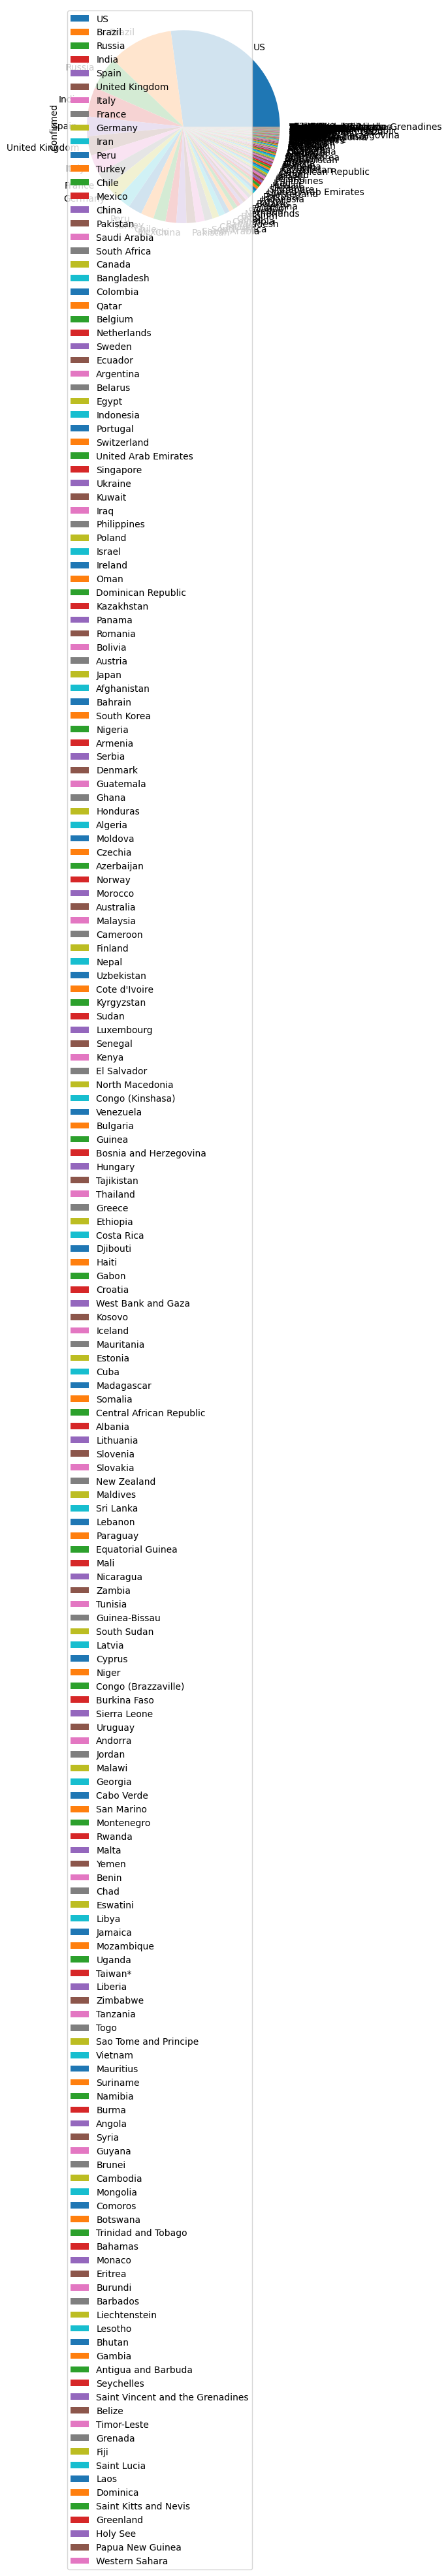

In [54]:
Country_Confirmed.plot.pie(y='Confirmed')

<Axes: ylabel='Recovered'>

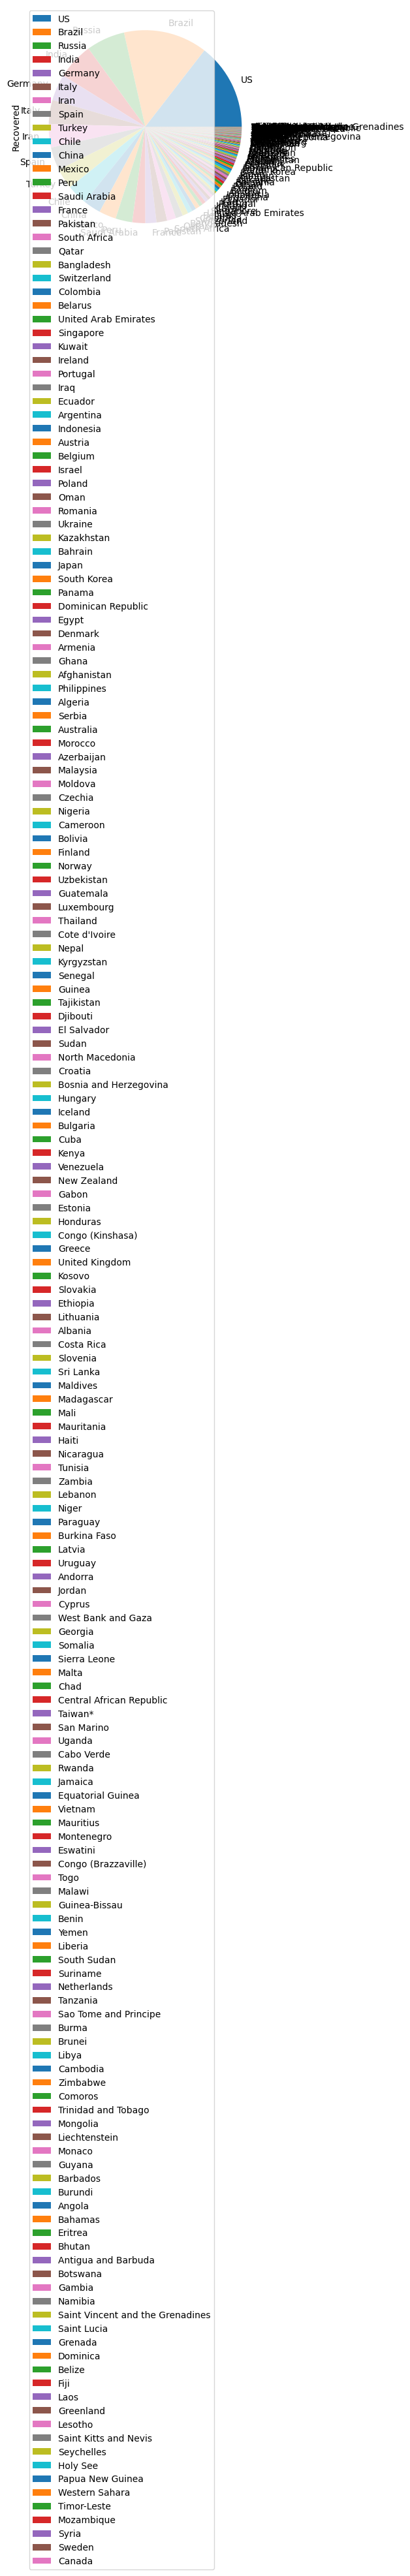

In [53]:
Country_Recovered.plot.pie(y='Recovered')

<Axes: ylabel='Deaths'>

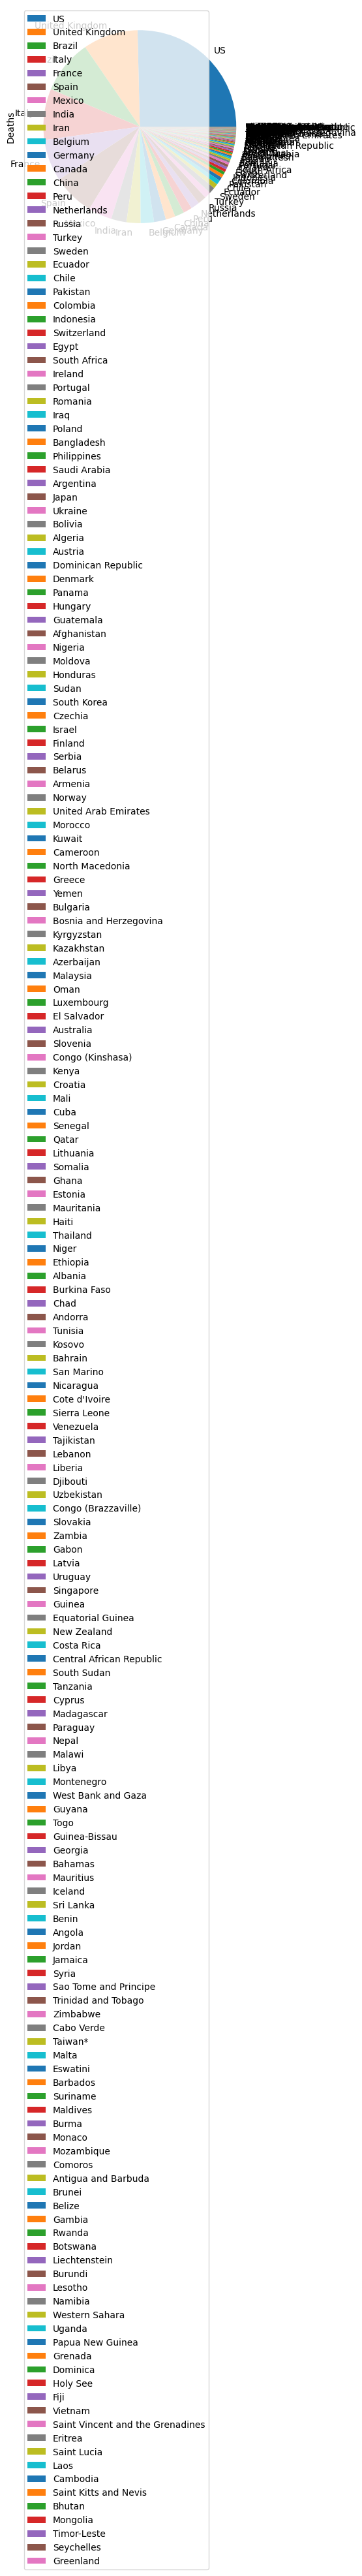

In [47]:
Country_Deaths.plot.pie(y='Deaths')

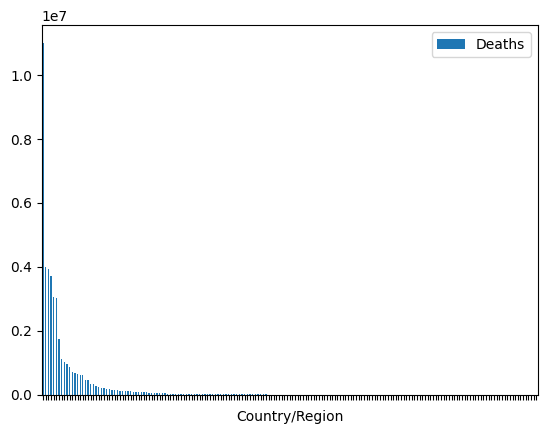

In [46]:
subplot = Country_Deaths.plot(kind='bar')
ax = subplot.axes
#ax.set_xticks([])       # Alternatively, you can manually adjust the ticks
ax.set_xticklabels([])   # or their labels
f = ax.get_figure()
f.show()

สรุปข้อมูลโควิดประจำวันของประเทศไทย

In [19]:
covidTh = covid[covid['Country/Region']== 'Thailand']
covidTh

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
207,NaN,Thailand,15.870032,100.992541,2020-01-22,2,0,0,2,South-East Asia
468,NaN,Thailand,15.870032,100.992541,2020-01-23,3,0,0,3,South-East Asia
729,NaN,Thailand,15.870032,100.992541,2020-01-24,5,0,0,5,South-East Asia
990,NaN,Thailand,15.870032,100.992541,2020-01-25,7,0,0,7,South-East Asia
1251,NaN,Thailand,15.870032,100.992541,2020-01-26,8,0,2,6,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47970,NaN,Thailand,15.870032,100.992541,2020-07-23,3279,58,3107,114,South-East Asia
48231,NaN,Thailand,15.870032,100.992541,2020-07-24,3279,58,3107,114,South-East Asia
48492,NaN,Thailand,15.870032,100.992541,2020-07-25,3282,58,3109,115,South-East Asia
48753,NaN,Thailand,15.870032,100.992541,2020-07-26,3291,58,3109,124,South-East Asia


สรุปข้อมูลโควิดประจำวันของประเทศไทย ในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ ระหว่างเทศกาลสงกรานต์ (13-18 เม.ย.) และหลังเทศกาลสงกรานต์หนึ่งสัปดาห์

In [38]:
covidTh_Before =  covidTh[(covidTh['Date'] > '2020-04-06') & (covidTh['Date'] <= '2020-04-12')]

<ipython-input-39-a5fa7a2810c7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covidTh_Before.groupby('Country/Region')['Confirmed', 'Recovered', 'Deaths'].mean().plot.bar()


<Axes: xlabel='Country/Region'>

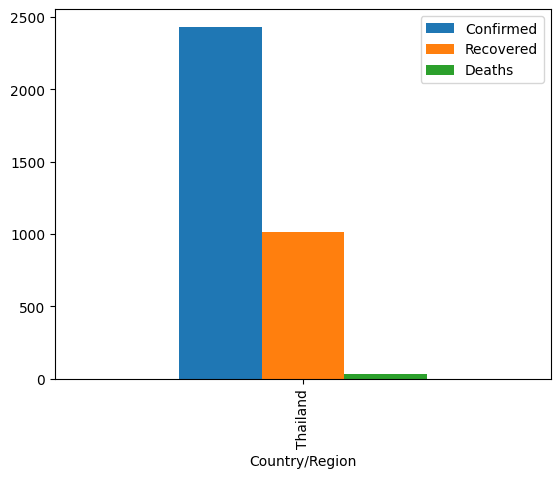

In [39]:
covidTh_Before.groupby('Country/Region')['Confirmed', 'Recovered', 'Deaths'].mean().plot.bar()

In [42]:
covidTh_Songkran = covidTh[(covidTh['Date'] > '2020-04-13') & (covidTh['Date'] <= '2020-04-18')]

<ipython-input-43-3008083243e3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covidTh_Songkran.groupby('Country/Region')['Confirmed', 'Recovered', 'Deaths'].mean().plot.bar()


<Axes: xlabel='Country/Region'>

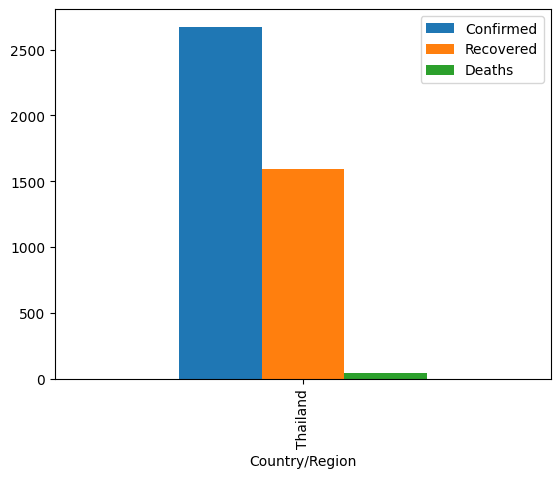

In [43]:
covidTh_Songkran.groupby('Country/Region')['Confirmed', 'Recovered', 'Deaths'].mean().plot.bar()

In [40]:
covidTh_After = covidTh[(covidTh['Date'] > '2020-04-19') & (covidTh['Date'] <= '2020-04-25')]

<ipython-input-41-2a0eef5bad9f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covidTh_After.groupby('Country/Region')['Confirmed', 'Recovered', 'Deaths'].mean().plot.bar()


<Axes: xlabel='Country/Region'>

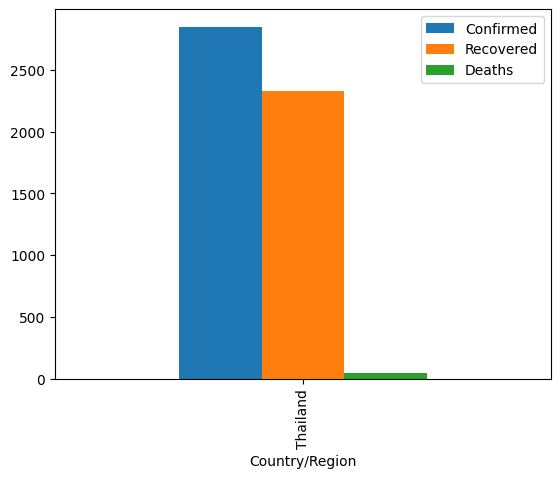

In [41]:
covidTh_After.groupby('Country/Region')['Confirmed', 'Recovered', 'Deaths'].mean().plot.bar()

จากกราฟจะเห็นได้ว่าในช่วงสงกรานต์และหลังสงกรานต์มีผู้ติดเชื้อโควิดมากขึ้น และช่วงหลังสงกรานต์มีผู้ที่ติดเชื้อโควิดและหายเพิ่มมากขึ้น ซึ่งอาจเป็นเพราะด้วยระยะเวลา 1-2 สัปดาห์ทำให้ผู้ที่ติดเชื้อหายป่วยได้